## **Objective**: To create a model that takes in a sentence and produces either 1 (indicating the sentence carries a positive sentiment) or a 0 (indicating the sentence carries a negative sentiment)

In [ ]:
import json

In [ ]:
reviews = []
filename = '/content/Books_small.json'
with open(filename) as f:
  for line in f:
    review = json.loads(line)
    reviews.append((review["reviewText"],review["overall"]))

In [ ]:
len(reviews)

1000

In [ ]:
import pandas as pd
data = pd.DataFrame(reviews, columns =['Review', 'Rating'])

In [ ]:
data.shape

(1000, 2)

In [ ]:
def get_sentiment(score):
        if  score <= 2 or score == 3 :
          return 0
        else:
          return 1

In [ ]:
data.head(20)

,Review,Rating
0,Da Silva takes the divine by storm with this u...,4.0
1,For me personally it's the most disappointing ...,2.0
2,"Very simple book, but leaves you feeling good....",4.0
3,I read a library copy of this exceptionally we...,5.0
4,With the government knowing this could happen ...,5.0
5,"Love the book, great story line, keeps you ent...",4.0
6,A well written fast paced story with twists an...,5.0
7,It was good....there is a lot going on with mu...,4.0
8,"I sit here, in tears. I don't even know what ...",5.0
9,Loved it! Could not put it down! The only thin...,5.0


In [ ]:
data['Rating'] = data['Rating'].apply(lambda x : get_sentiment(x))

In [ ]:
data.head(20)

,Review,Rating
0,Da Silva takes the divine by storm with this u...,1
1,For me personally it's the most disappointing ...,0
2,"Very simple book, but leaves you feeling good....",1
3,I read a library copy of this exceptionally we...,1
4,With the government knowing this could happen ...,1
5,"Love the book, great story line, keeps you ent...",1
6,A well written fast paced story with twists an...,1
7,It was good....there is a lot going on with mu...,1
8,"I sit here, in tears. I don't even know what ...",1
9,Loved it! Could not put it down! The only thin...,1


## Installing the transformers library
Let's start by installing the hugging face transformers library so we can load our deep learning NLP model.

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 9.1MB/s 
     |████████████████████████████████| 3.3MB 47.2MB/s 
     |████████████████████████████████| 901kB 44.2MB/s 


In [ ]:
#installing required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


## Loading the Pre-trained distillBERT model

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**Preparing the Dataset**

Before we can hand our sentences to distillBERT, we need to so some minimal processing to put them in the format it requires

## Step1: Tokenization

In [ ]:
tokenized_ids = data['Review'].apply((lambda x: tokenizer.encode(x,add_special_tokens=True)))

Token indices sequence length is longer than the specified maximum sequence length for this model (640 > 512). Running this sequence through the model will result in indexing errors


## The below picture describes the process of tokenization

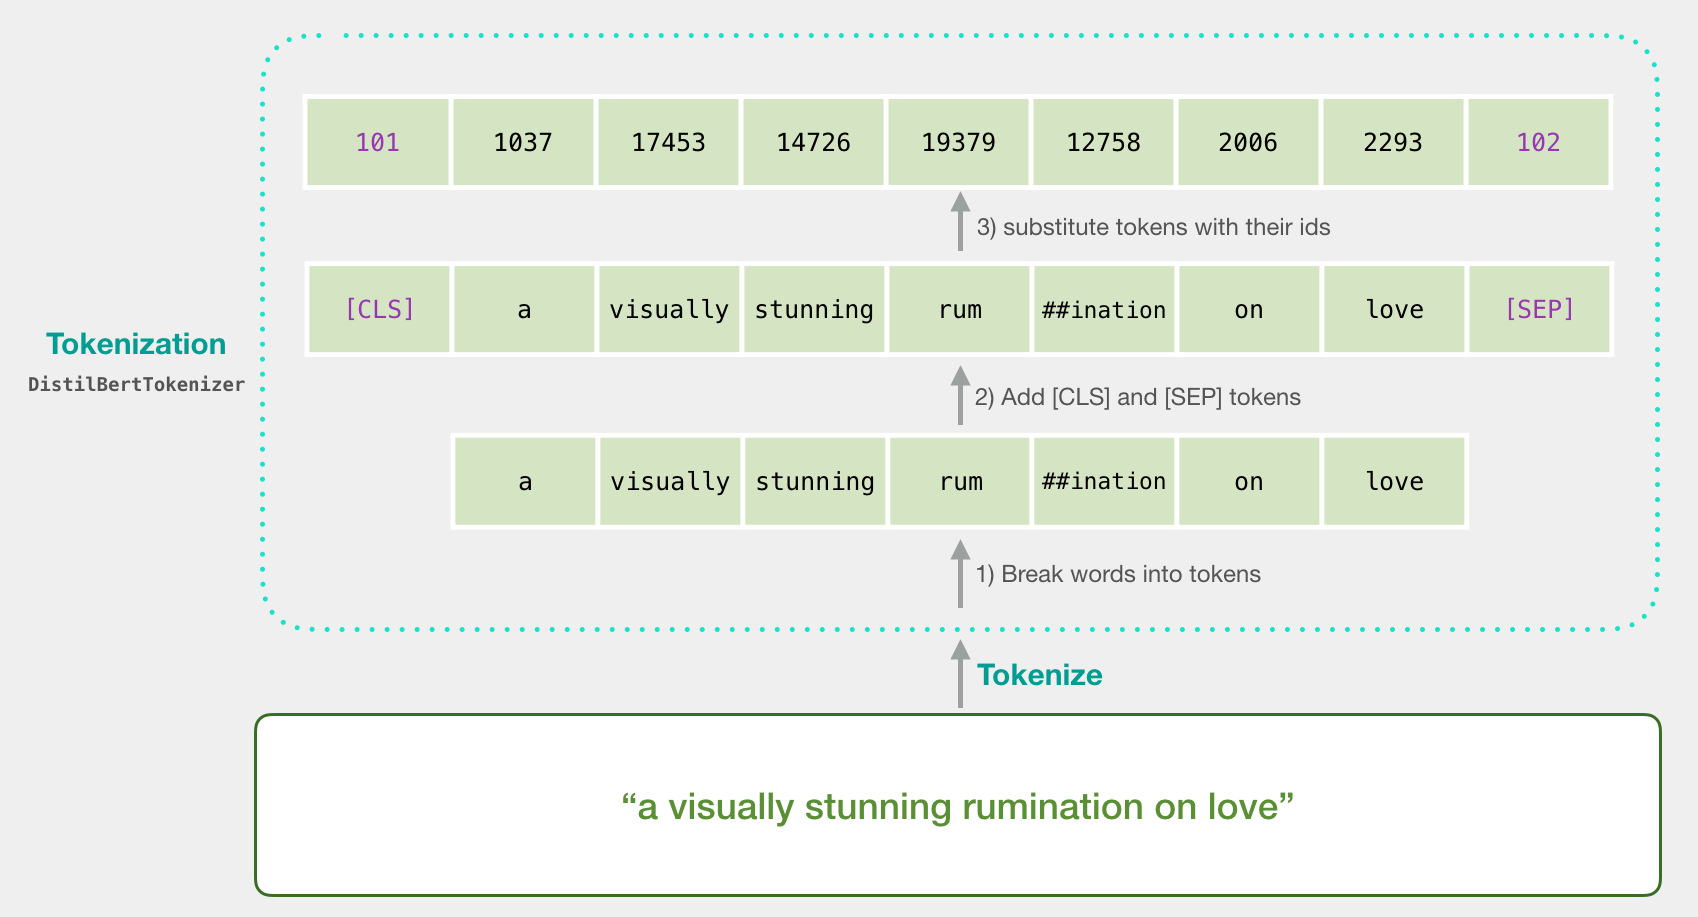

In [ ]:
labels = data['Rating']

## Step2: Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 256
padded = pad_sequences(tokenized_ids,maxlen=MAX_LEN,padding='post', truncating='post', dtype='long')

In [ ]:
padded[0]

array([  101,  4830, 11183,  3138,  1996,  7746,  2011,  4040,  2007,
        2023,  4310,  2047,  3117,  1012,  2016, 11791,  1037,  2088,
        4406,  2151,  2500,  2096,  4363,  2009,  7933,  1999,  1996,
        2613,  2088,  1012,  2023,  2003,  1037,  2200,  2092,  2517,
        1998, 14036,  3117,  1012,  1045,  2001,  3243,  7622,  1998,
       18896,  2011,  1996,  2126,  2008,  2023,  5024,  9994,  2001,
        2764,  1010,  5026,  1996,  8141,  2157,  2046,  1996,  2088,
        1997,  1996,  2466,  1012,  1045,  2001,  5117,  2802,  1998,
        5791,  5632,  2026,  2051,  2985,  3752,  2009,  1012,  1045,
        3866,  1996,  2839,  2458,  1999,  2023,  3117,  1012,  4830,
       11183,  9005,  1037,  3459,  1997,  2152,  2082,  2493,  2040,
        2941,  2552,  2066,  2152,  2082,  2493,  1012,  1045,  2428,
       12315,  1996,  2755,  2008,  3904,  1997,  2068,  2020,  6908,
        2046,  8146,  2521,  3458,  2037,  2086,  1010,  4496,  2106,
        2027,  3066,

In [ ]:
padded.shape

(1000, 256)

## Step3: Masking

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(1000, 256)

##  Now that we have our model and inputs ready, let's run our model!

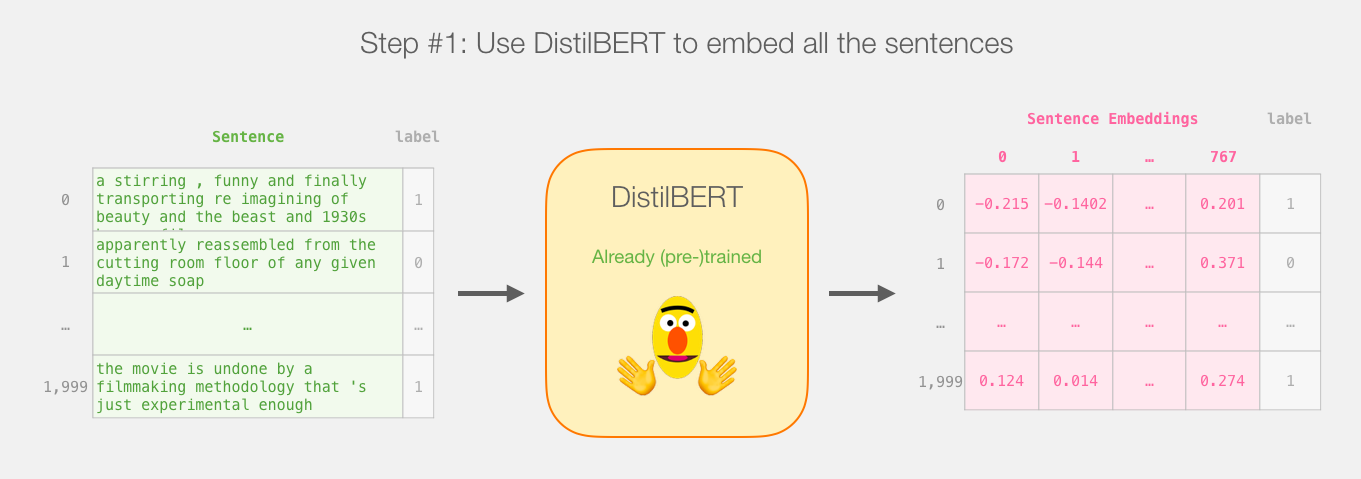


The model() function runs our sentences through BERT. The results of the processing will be returned into last_hidden_states.

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)


The way BERT does sentence classification, is that it adds a token called [CLS] (for classification) at the beginning of every sentence. The output corresponding to that token can be thought of as an embedding for the entire sentence

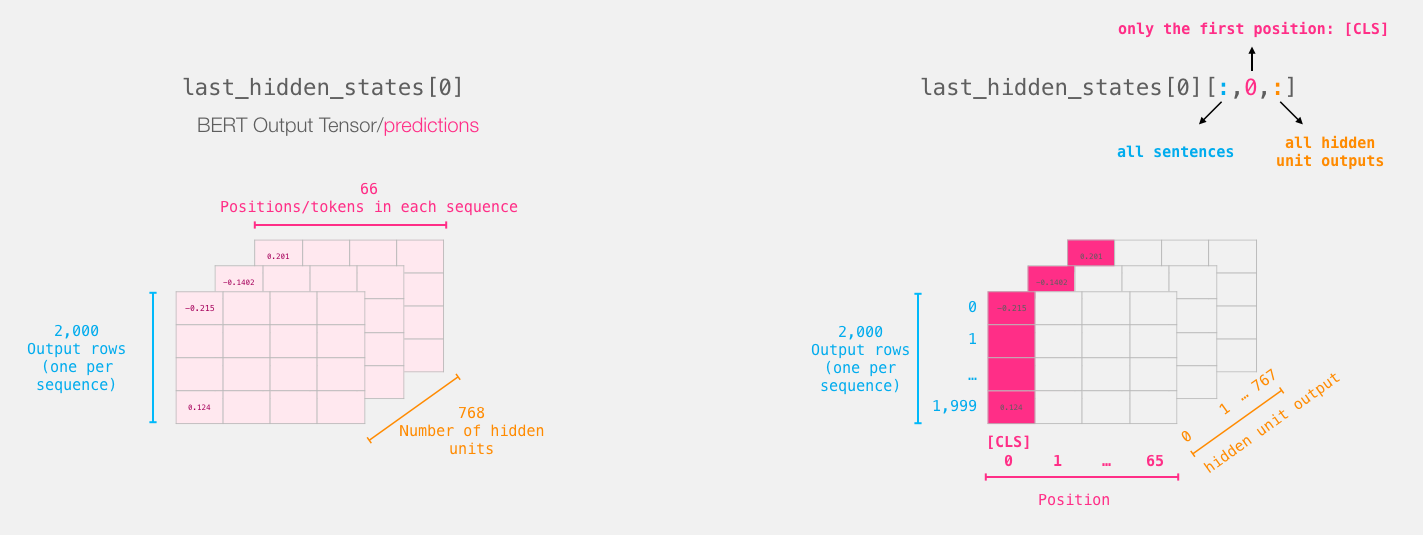

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
#Let's now split our datset into a training set and testing set
X_train,X_test,y_train,y_test = train_test_split(features, labels , test_size = 0.2)

In [ ]:
print(X_train.shape,X_test.shape)

(800, 768) (200, 768)


## Classification model 1: Logistic Regression

In [ ]:
#Hyperparameter  optimization
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(X_train,y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 5.263252631578947}
best scrores:  0.8724999999999999


In [ ]:
lr_clf = LogisticRegression(C=5.263)
lr_clf.fit(X_train,y_train)

LogisticRegression(C=5.263, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the model

In [ ]:
#check the accuracy against the testing dataset
lr_clf.score(X_test,y_test)

0.865

In [ ]:
#Check F1 score

from sklearn.metrics import f1_score

f1_score(y_test, lr_clf.predict(X_test))

0.918429003021148

## Model2: Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Evaluating the model

In [ ]:
#check the accuracy against the testing dataset
dt_clf.score(X_test,y_test)

0.805

In [ ]:
#Check F1 score
f1_score(y_test, dt_clf.predict(X_test))

0.8814589665653495

## Model3: SVC


In [ ]:
svc_clf = svm.SVC(kernel='linear')
svc_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Evaluating the model

In [ ]:
#check the accuracy against the testing dataset
svc_clf.score(X_test,y_test)

0.855

In [ ]:
#Check F1 score
f1_score(y_test, svc_clf.predict(X_test))

0.9123867069486405

In [ ]:
#Comparing the accuracy of our models with a dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, X_train,y_train)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.724 (+/- 0.02)


## Conclusion: 
Our classification ML models clearly outperform the dummy classifier model.